In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):

    sigmoid = 1 / (1 + np.exp(-x))
    
    return sigmoid

def sigmoid_derivative(x):
    
    sigmoid_derivative = sigmoid(x) * (1-sigmoid(x))
    
    return sigmoid_derivative

def relu(x):
    
    relu = np.maximum(0,x)
    
    return relu

In [4]:
class NeuralNetwork:
    def __init__(
            self,
            X_data,
            Y_data,
            n_hidden_neurons,
            n_categories,
            epochs,
            batch_size,
            eta,
            lmbd,
            act):

        self.X_data_full = X_data
        self.Y_data_full = Y_data

        self.n_inputs = X_data.shape[0]
        self.n_features = X_data.shape[1]
        self.n_hidden_neurons = n_hidden_neurons
        self.n_categories = n_categories

        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        self.eta = eta
        self.lmbd = lmbd
        self.act = act
        
        self.cost_out = list()

        self.create_biases_and_weights()
        

    def create_biases_and_weights(self):
        self.hidden_weights = np.random.randn(self.n_features, self.n_hidden_neurons)
        self.hidden_bias = np.zeros(self.n_hidden_neurons) + 0.01

        self.output_weights = np.random.randn(self.n_hidden_neurons, self.n_categories)
        self.output_bias = np.zeros(self.n_categories) + 0.01

    def feed_forward(self):
        # feed-forward for training
        self.z_h = np.matmul(self.X_data, self.hidden_weights) + self.hidden_bias
        if self.act == 'sigmoid':
            self.a_h = sigmoid(self.z_h)
    
            self.z_o = np.matmul(self.a_h, self.output_weights) + self.output_bias
            self.a_o = sigmoid(self.z_o)
        
        if self.act == 'tanh':
            self.a_h = np.tanh(self.z_h)
            
            self.z_o = np.matmul(self.a_h, self.output_weights) + self.output_bias
            self.a_o = np.tanh(self.z_o)
            
        if self.act == 'relu':
            self.a_h = relu(self.z_h)
            
            self.z_o = np.matmul(self.a_h, self.output_weights) + self.output_bias
            self.a_o = relu(self.z_o)
            
        #exp_term = np.exp(self.z_o)
        #print('exp_term SUM', np.sum(exp_term, keepdims=True))
        #self.probabilities = exp_term / np.sum(exp_term, keepdims=True)#, axis=1, keepdims=True)
        #print(self.probabilities)

    def feed_forward_out(self, X):
        # feed-forward for output
        z_h = np.matmul(X, self.hidden_weights) + self.hidden_bias
        #a_h = sigmoid(z_h)
        
        #z_o = np.matmul(a_h, self.output_weights) + self.output_bias
        #a_o = sigmoid(z_o)
        
        if self.act == 'sigmoid':
            a_h = sigmoid(z_h)
    
            z_o = np.matmul(a_h, self.output_weights) + self.output_bias
            a_o = sigmoid(z_o)
        
        if self.act == 'tanh':
            a_h = np.tanh(z_h)
            
            z_o = np.matmul(a_h, self.output_weights) + self.output_bias
            a_o = np.tanh(z_o)
            
        if self.act == 'relu':
            a_h = relu(z_h)
            
            z_o = np.matmul(a_h, self.output_weights) + self.output_bias
            a_o = relu(z_o)    

        return a_o

    def loss_function(self):
        pass
    
    def backpropagation(self):
        #error_output = self.probabilities - self.Y_data
        error_output = (self.a_o - self.Y_data)*sigmoid_derivative(self.a_o)
        
        # ERROR MÅ ENDRES FOR FRANKE
        # Only for sigmoid?:
        if self.act == 'sigmoid':
            error_hidden = np.matmul(error_output, self.output_weights.T) * self.a_h * (1 - self.a_h)

        elif self.act == 'relu':
            error_hidden = np.array(np.matmul(error_output, self.output_weights.T))
            error_hidden[error_hidden > 0] = 1
            error_hidden[error_hidden <= 0] = 0
        
        if self.act == 'tanh':
            error_hidden = np.matmul(error_output, self.output_weights.T) * self.a_h * (1 - self.a_h)
            
        elif self.act == 'linear':
            
            #error_hidden = MSE ... 
            pass
        
        self.output_weights_gradient = np.matmul(self.a_h.T, error_output)
        self.output_bias_gradient = np.sum(error_output, axis=0)

        self.hidden_weights_gradient = np.matmul(self.X_data.T, error_hidden)
        self.hidden_bias_gradient = np.sum(error_hidden, axis=0)

        if self.lmbd > 0.0:
            self.output_weights_gradient += self.lmbd * self.output_weights
            self.hidden_weights_gradient += self.lmbd * self.hidden_weights

        self.output_weights -= self.eta * self.output_weights_gradient
        self.output_bias -= self.eta * self.output_bias_gradient
        self.hidden_weights -= self.eta * self.hidden_weights_gradient
        self.hidden_bias -= self.eta * self.hidden_bias_gradient
        
        #print('here, have updated by', self.eta * self.output_weights_gradient)

        
    def predict(self, X):
        probabilities = self.feed_forward_out(X)
        #print(probabilities)
        #return np.argmax(probabilities, axis=1)
        #self.accuracy()
        
        probabilities[probabilities >= 0.5] = 1
        probabilities[probabilities < 0.5] = 0
        
        return probabilities
        
    def predict_probabilities(self, X):
        probabilities = self.feed_forward_out(X)
        return probabilities

    def train(self):
        data_indices = np.arange(self.n_inputs)

        for i in range(self.epochs):
            for j in range(self.iterations):
                # pick datapoints with replacement
                chosen_datapoints = np.random.choice(
                    data_indices, size=self.batch_size, replace=True
                )

                # minibatch training data
                self.X_data = self.X_data_full[chosen_datapoints]
                self.Y_data = self.Y_data_full[chosen_datapoints]
                
                self.feed_forward()
                self.backpropagation()
                
            
    def printing(self):
        #print('prob', self.probabilities)
        print('O_w',  self.output_weights)
        print('O_b',  self.output_bias)
        print('H_w',  self.hidden_weights)
        print('H_B',  self.hidden_bias)
        

    # COST FUNCTION FRANKE


In [5]:
# READ IN DATA

nanDict = {}
df = pd.read_excel('creditcard_data.xls', header=1, skiprows=0, index_col=0, na_values=nanDict)
df.rename(index=str, columns={"default payment next month": "defaultPaymentNextMonth"}, inplace=True)# Features and targets 

df = df.drop(df[(df.BILL_AMT1 == 0) &
                (df.BILL_AMT2 == 0) &
                (df.BILL_AMT3 == 0) &
                (df.BILL_AMT4 == 0) &
                (df.BILL_AMT5 == 0) &
                (df.BILL_AMT6 == 0)].index)

df = df.drop(df[(df.PAY_AMT1 == 0) &
                (df.PAY_AMT2 == 0) &
                (df.PAY_AMT3 == 0) &
                (df.PAY_AMT4 == 0) &
                (df.PAY_AMT5 == 0) &
                (df.PAY_AMT6 == 0)].index)

X = df.loc[:, df.columns != 'defaultPaymentNextMonth'].values
y = df.loc[:, df.columns == 'defaultPaymentNextMonth'].values

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder = OneHotEncoder(categories = "auto")

X = ColumnTransformer(
    [("", onehotencoder,  [1, 2, 3, 4]),],
    remainder="passthrough"
).fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, test_size = 1-0.5)

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()#(with_mean=False)
X_train = sc.fit_transform(X_train.toarray())
X_test = sc.transform(X_test.toarray())

# One-hot's of the target vector
y_train_onehot, y_test_onehot = onehotencoder.fit_transform(y_train), onehotencoder.fit_transform(y_test)

In [9]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error, log_loss

In [10]:
# ARRAYS FOR TEST
y_train_try_zeros = np.zeros(y_train.shape)
y_train_try_ones = np.ones(y_train.shape)

In [10]:
n_inputs, n_features = X_train.shape
n_hidden_neurons = 50
n_categories = 1
epochs = 100
batch_size = 10
iterations = n_inputs // batch_size
#iterations = 10
#eta = 10e-4
#lmbd = 0.1

In [35]:
# OUR OWN IMPLEMENTATION

dnn = NeuralNetwork(X_train, y_train, eta=eta, lmbd=lmbd, epochs=epochs, batch_size=batch_size,
                    n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, act='sigmoid')

In [36]:
dnn.train()
test_predict = dnn.predict(X_test)

In [37]:
print("Accuracy score on test set: ", accuracy_score(y_test, test_predict))
print("F1", f1_score(y_test, test_predict))
print("Conf \n", confusion_matrix(y_test, test_predict))
print("R2", r2_score(y_test, test_predict))
print("MSE", mean_squared_error(y_test, test_predict))

Accuracy score on test set:  0.7846164643132851
F1 0.0058309037900874635
Conf 
 [[11171     4]
 [ 3065     9]]
R2 -0.27300432726526447
MSE 0.21538353568671487


In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

# PLOTS

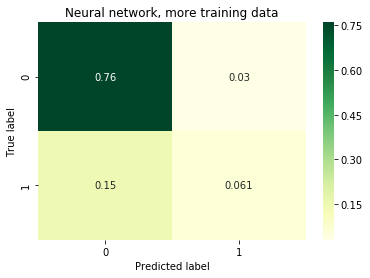

In [18]:
conf_mat_own = confusion_matrix(y_test, test_predict)
fig = sb.heatmap(conf_mat_own/np.sum(conf_mat_own), annot=True, cmap=plt.cm.YlGn, yticklabels=['0', '1'])
fig.set_yticks([0.5, 1.5])
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label', title='Neural network, more training data')
plt.show()

In [37]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,1), alpha=0.1, batch_size=80, learning_rate = 'constant', learning_rate_init = 10e-4, max_iter=178, activation='logistic')
mlp.fit(X_train.toarray(), np.ravel(y_train))
#print(mlp.score(X_test, y_test)

y_pred = mlp.predict(X_test.toarray())

In [123]:
print("Acc", accuracy_score(y_test, y_pred))
print("F1", f1_score(np.ravel(y_test), y_pred))
print("conf \n", confusion_matrix(np.ravel(y_test), y_pred))
print("R2", r2_score(np.ravel(y_test), y_pred))
print("MSE", mean_squared_error(np.ravel(y_test), y_pred))

Acc 0.8232858446206751
F1 0.4703407656710139
conf 
 [[10613   573]
 [ 1945  1118]]
R2 -0.04717267322458185
MSE 0.17671415537932486


In [124]:
conf_mat = confusion_matrix(np.ravel(y_test), y_pred)

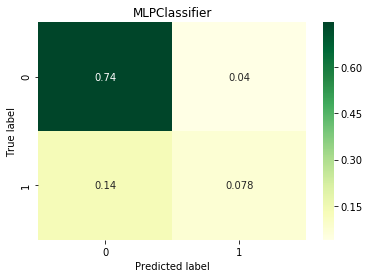

In [125]:
fig = sb.heatmap(conf_mat/np.sum(conf_mat), annot=True, cmap=plt.cm.YlGn, yticklabels=['0', '1'])
fig.set_yticks([0.5, 1.5])
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label', title='MLPClassifier')
plt.show()

In [134]:
mlp_6 = MLPClassifier(hidden_layer_sizes=(50,6-2), alpha=0.1, batch_size=80, learning_rate = 'constant', learning_rate_init = 10e-4, max_iter=178, activation='logistic')
mlp_6.fit(X_train.toarray(), np.ravel(y_train))
#print(mlp.score(X_test, y_test)

y_pred_6 = mlp_6.predict(X_test.toarray())

In [135]:
print("Acc", accuracy_score(y_test, y_pred_6))
print("F1", f1_score(np.ravel(y_test), y_pred_6))
print("conf \n", confusion_matrix(np.ravel(y_test), y_pred_6))
print("R2", r2_score(np.ravel(y_test), y_pred_6))
print("MSE", mean_squared_error(np.ravel(y_test), y_pred_6))

Acc 0.823496385711278
F1 0.46455184160102203
conf 
 [[10643   543]
 [ 1972  1091]]
R2 -0.04592504891176463
MSE 0.17650361428872202


In [136]:
conf_mat_6 = confusion_matrix(np.ravel(y_test), y_pred_6)

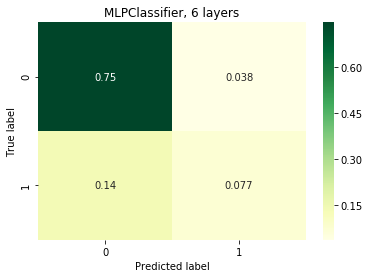

In [137]:
fig = sb.heatmap(conf_mat_6/np.sum(conf_mat_6), annot=True, cmap=plt.cm.YlGn, yticklabels=['0', '1'])
fig.set_yticks([0.5, 1.5])
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label', title='MLPClassifier, 6 layers')
plt.show()

In [ ]:
#dnn = NeuralNetwork(X_train.toarray(), y_train, eta=eta, lmbd=lmbd, epochs=epochs, batch_size=batch_size,
#                    n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, act='relu')

In [30]:
n_inputs, n_features = X_train.shape
n_hidden_neurons = 50
n_categories = 1
epochs = 100
batch_size = 80
iterations = n_inputs // batch_size
#iterations = 10
#eta = 10e-4
#lmbd = 0.1

In [41]:
#eta_vals = np.logspace(-5, 1, 7)
eta_vals= np.logspace(-5, 0, 6)
#lmbd_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 0, 6)

# store the models for later use
DNN_numpy = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)

# grid search
for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = NeuralNetwork(X_train.toarray(), y_train, eta=eta, lmbd=lmbd, epochs=epochs, batch_size=batch_size,
                            n_hidden_neurons=n_hidden_neurons, n_categories=n_categories, act='relu')
        dnn.train()
        
        DNN_numpy[i][j] = dnn
        
        test_predict = dnn.predict(X_test.toarray())
        
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on test set: ", accuracy_score(y_test, test_predict))
        #print("F1 score on test set: ", f1_score(y_test, test_predict))
        print()

Learning rate  =  1e-05
Lambda =  1e-05
Accuracy score on test set:  0.7827215944978595

Learning rate  =  1e-05
Lambda =  0.0001
Accuracy score on test set:  0.7821601515895852

Learning rate  =  1e-05
Lambda =  0.001
Accuracy score on test set:  0.7812478068636396

Learning rate  =  1e-05
Lambda =  0.01
Accuracy score on test set:  0.7826514141343253

Learning rate  =  1e-05
Lambda =  0.1
Accuracy score on test set:  0.7823005123166538

Learning rate  =  1e-05
Lambda =  1.0
Accuracy score on test set:  0.7822303319531195

Learning rate  =  0.0001
Lambda =  1e-05
Accuracy score on test set:  0.7826514141343253

Learning rate  =  0.0001
Lambda =  0.0001
Accuracy score on test set:  0.7826514141343253

Learning rate  =  0.0001
Lambda =  0.001
Accuracy score on test set:  0.7826514141343253

Learning rate  =  0.0001
Lambda =  0.01
Accuracy score on test set:  0.7826514141343253

Learning rate  =  0.0001
Lambda =  0.1
Accuracy score on test set:  0.7826514141343253

Learning rate  =  0.00

C:\Users\Mina\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mina\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mina\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mina\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mina\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetri

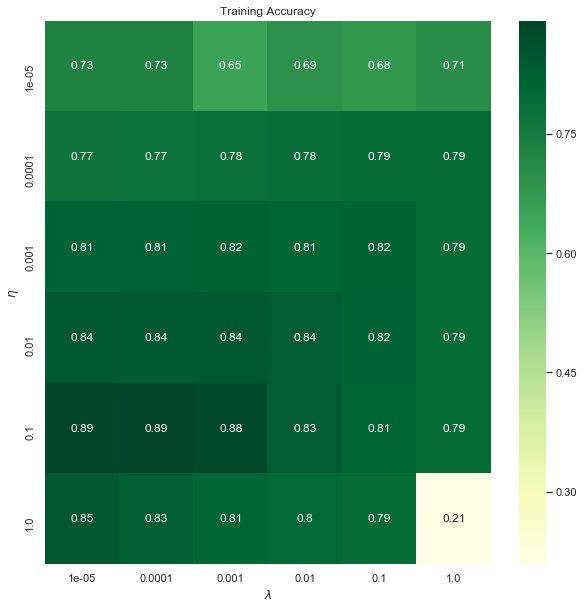

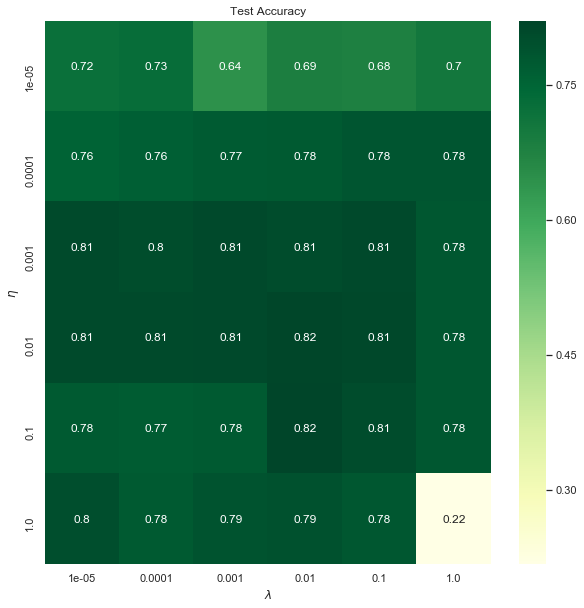

In [35]:

sb.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

train_f1 = np.zeros((len(eta_vals), len(lmbd_vals)))
test_f1 = np.zeros((len(eta_vals), len(lmbd_vals)))


for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_numpy[i][j]
        
        train_pred = dnn.predict(X_train.toarray()) 
        test_pred = dnn.predict(X_test.toarray())

        train_accuracy[i][j] = accuracy_score(np.ravel(y_train), train_pred)
        test_accuracy[i][j] = accuracy_score(np.ravel(y_test), test_pred)
        
        train_f1[i][j] = f1_score(np.ravel(y_train), train_pred)
        test_f1[i][j] = f1_score(np.ravel(y_test), test_pred)

        
fig, ax = plt.subplots(figsize = (10, 10))
sb.heatmap(train_accuracy, annot=True, ax=ax, cmap=plt.cm.YlGn, xticklabels=lmbd_vals, yticklabels=eta_vals)
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sb.heatmap(test_accuracy, annot=True, ax=ax, cmap=plt.cm.YlGn, xticklabels=lmbd_vals, yticklabels=eta_vals)
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

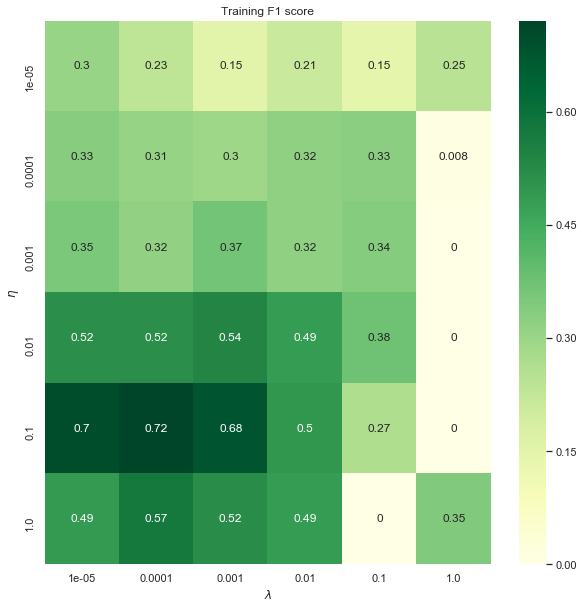

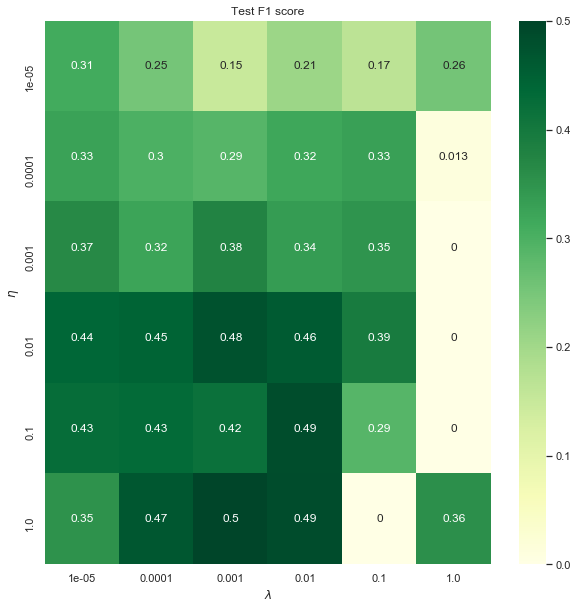

In [36]:
fig, ax = plt.subplots(figsize = (10, 10))
sb.heatmap(train_f1, annot=True, ax=ax, cmap=plt.cm.YlGn, xticklabels=lmbd_vals, yticklabels=eta_vals)
ax.set_title("Training F1 score")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sb.heatmap(test_f1, annot=True, ax=ax, cmap=plt.cm.YlGn, xticklabels=lmbd_vals, yticklabels=eta_vals)
ax.set_title("Test F1 score")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

In [12]:
from sklearn.neural_network import MLPClassifier

In [ ]:
eta_vals = np.logspace(-5, 0, 6)
lmbd_vals = np.logspace(-5, 0, 6)


DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
train_mse_sk = np.zeros((len(eta_vals), len(lmbd_vals)))
train_r2_sk = np.zeros((len(eta_vals), len(lmbd_vals)))

for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):

        # SCIKIT-LEARN
        dnn_sk = MLPClassifier(hidden_layer_sizes=(n_hidden_neurons), learning_rate = 'constant', learning_rate_init=eta, max_iter=178, activation='logistic',
                            alpha=lmbd)
        dnn_sk.fit(X_train, np.ravel(y_train))
        
        DNN_scikit[i][j] = dnn_sk
        train_pred_sk = dnn_sk.predict(X_test)
        train_mse_sk[i][j] = mean_squared_error(np.ravel(y_test), train_pred_sk)
        train_r2_sk[i][j] = r2_score(np.ravel(y_test), train_pred_sk)
        

In [ ]:
sb.set()

fig, ax = plt.subplots(figsize = (10, 10))
sb.heatmap(train_f1, annot=True, ax=ax, cmap=plt.cm.YlGn, xticklabels=lmbd_vals, yticklabels=eta_vals)
ax.set_title("Training F1 score")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sb.heatmap(test_f1, annot=True, ax=ax, cmap=plt.cm.YlGn, xticklabels=lmbd_vals, yticklabels=eta_vals)
ax.set_title("Test F1 score")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

C:\Users\Mina\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mina\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


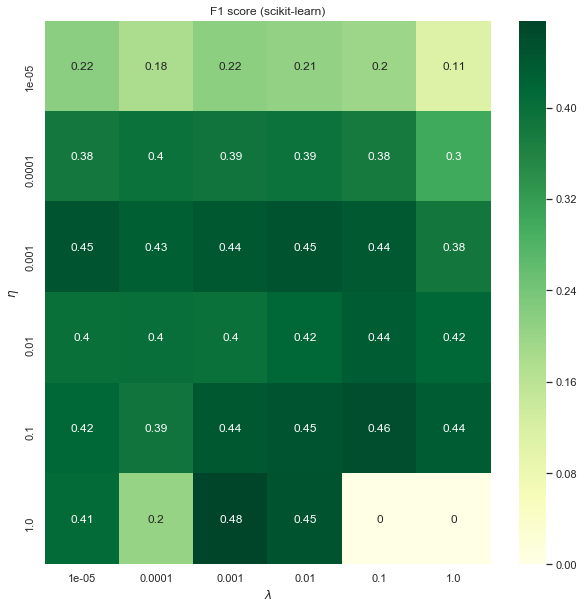

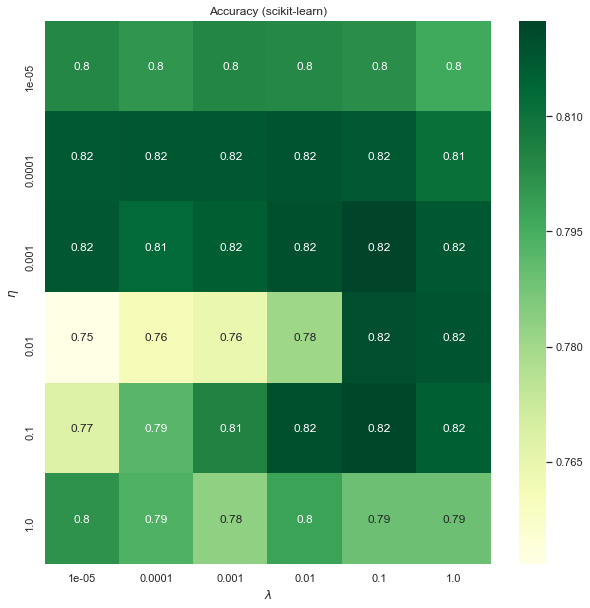

In [16]:
sb.set()

#train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy_sk = np.zeros((len(eta_vals), len(lmbd_vals)))

#train_f1 = np.zeros((len(eta_vals), len(lmbd_vals)))
test_f1_sk = np.zeros((len(eta_vals), len(lmbd_vals)))


for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_scikit[i][j]
        
        #train_pred = dnn.predict(X_train.toarray()) 
        test_pred = dnn.predict(X_test)

        #train_accuracy[i][j] = accuracy_score(np.ravel(y_train), train_pred)
        test_accuracy_sk[i][j] = accuracy_score(np.ravel(y_test), test_pred)
        
        #train_f1[i][j] = f1_score(np.ravel(y_train), train_pred)
        test_f1_sk[i][j] = f1_score(np.ravel(y_test), test_pred)

        
fig, ax = plt.subplots(figsize = (10, 10))
sb.heatmap(test_f1_sk, annot=True, ax=ax, cmap=plt.cm.YlGn, xticklabels=lmbd_vals, yticklabels=eta_vals)
ax.set_title("F1 score (scikit-learn)")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sb.heatmap(test_accuracy_sk, annot=True, ax=ax, cmap=plt.cm.YlGn, xticklabels=lmbd_vals, yticklabels=eta_vals)
ax.set_title("Accuracy (scikit-learn)")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()